# Explore here

In [4]:
# Your code here
# Your code here
import pandas as pd


#URL of the Dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
#Download and load the dataset into a Dataframe
total_data = pd.read_csv(url)

print(total_data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [6]:
# Save the DataFrame to a local CSV file in the '../data/raw/' directory
total_data.to_csv('../data/raw/medical_insurance_cost.csv', index=False)
print(f'File saved at: ../data/raw/bank-marketing-campaign-data.csv')

File saved at: ../data/raw/bank-marketing-campaign-data.csv


In [7]:
# Obtener las dimensiones
total_data.shape

(1338, 7)

In [ ]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


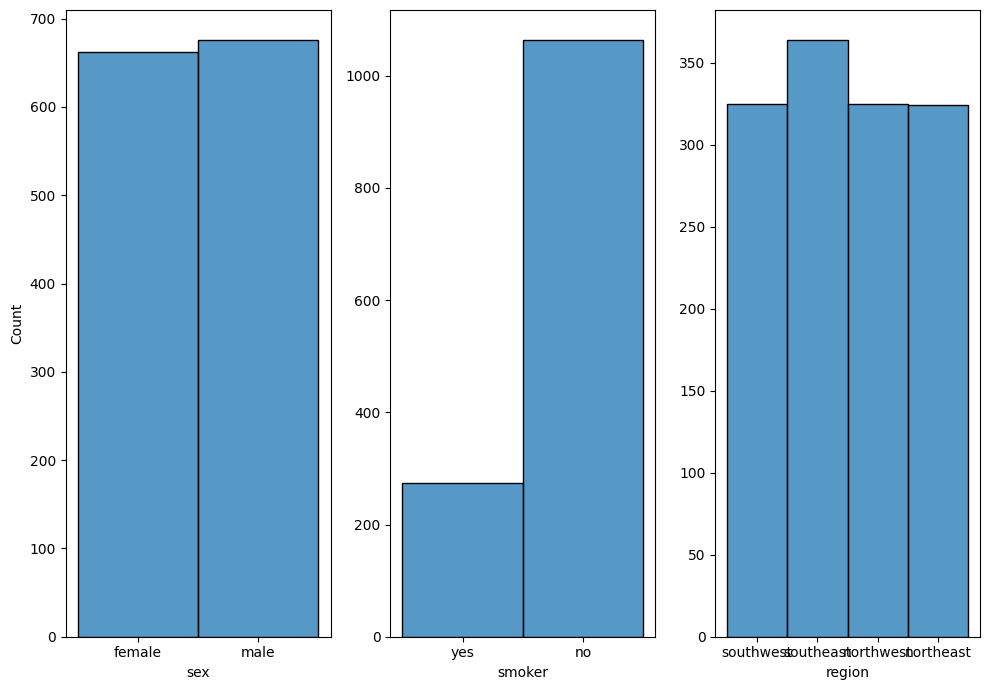

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (10, 7))

# Crear un histograma múltiple

sns.histplot(ax = axis[0], data = total_data, x = "sex")
sns.histplot(ax = axis[1], data = total_data, x = "smoker").set(ylabel = None)
sns.histplot(ax = axis[2], data = total_data, x = "region").set(ylabel = None)


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

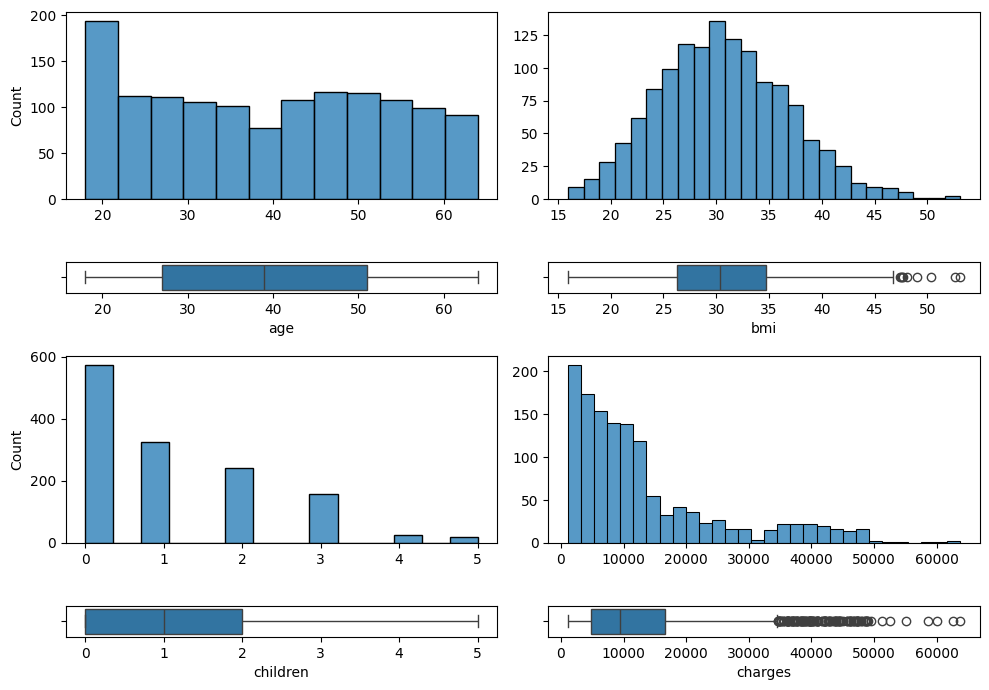

In [10]:
fig, axis = plt.subplots(4, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "age")
sns.histplot(ax = axis[0, 1], data = total_data, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "bmi")
sns.histplot(ax = axis[2, 0], data = total_data, x = "children").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "children")
sns.histplot(ax = axis[2, 1], data = total_data, x = "charges").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "charges")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

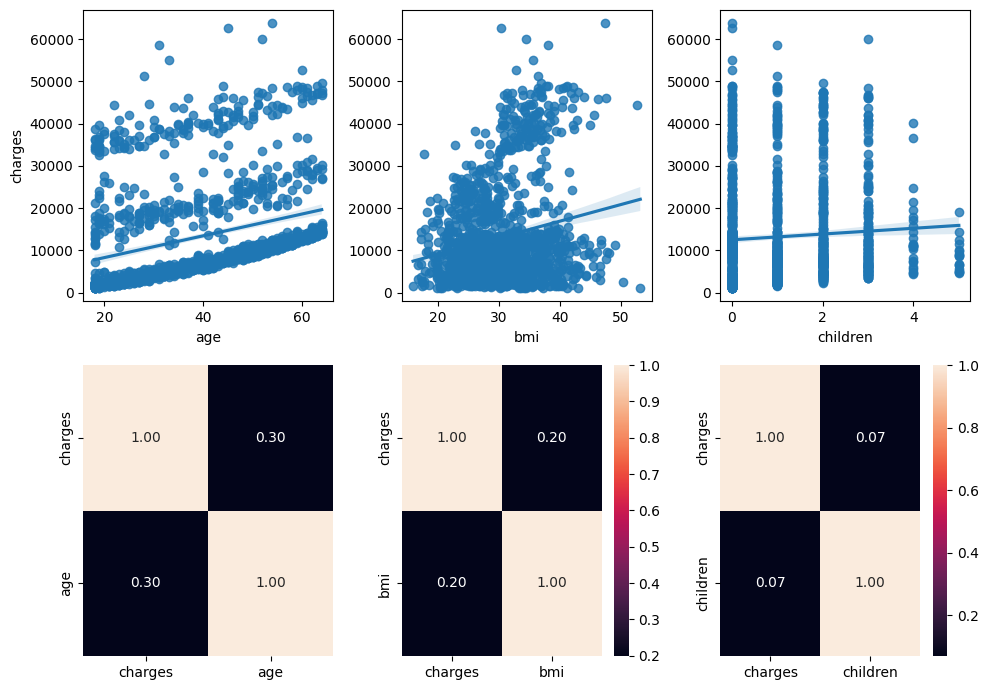

In [11]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_data, x = "age", y = "charges")
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "bmi", y = "charges").set(ylabel=None)
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[0, 2], data = total_data, x = "children", y = "charges").set(ylabel=None)
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

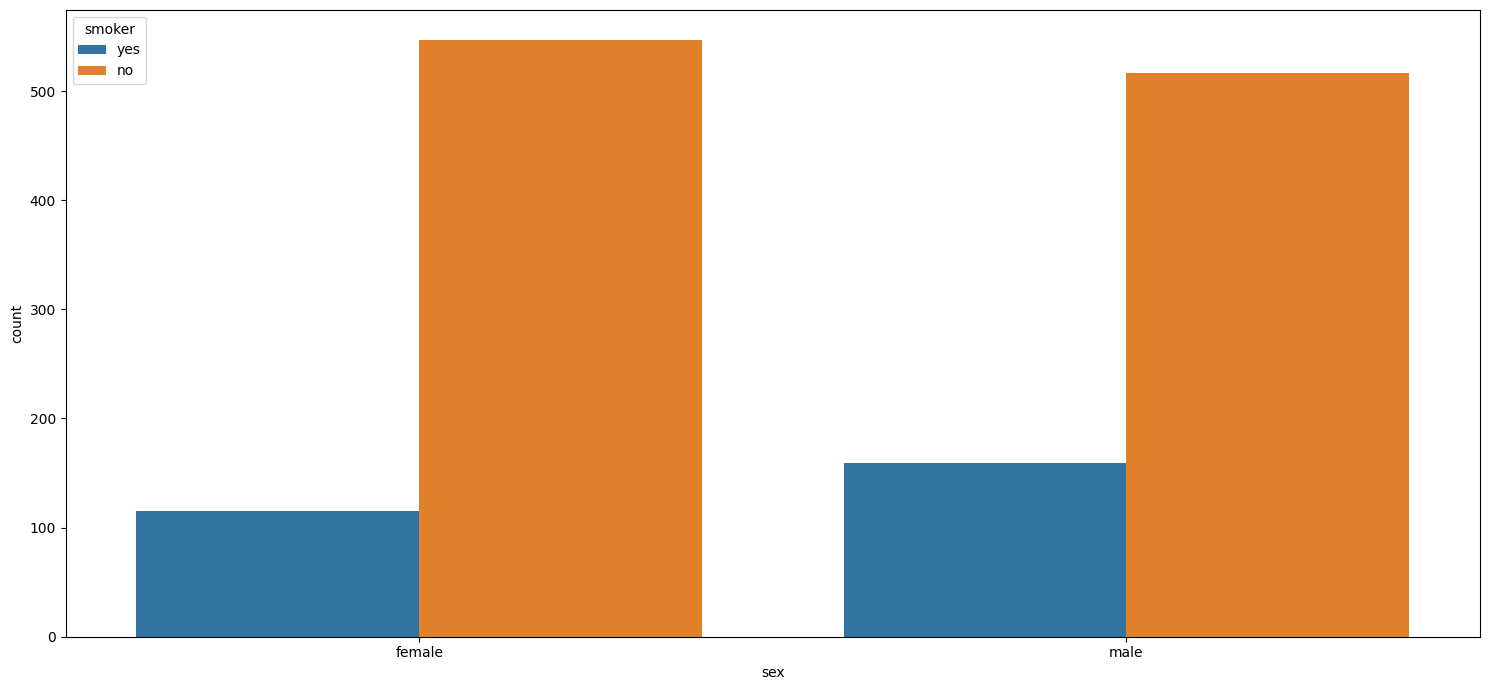

In [12]:
fig, axis = plt.subplots(1, figsize = (15, 7))

sns.countplot(data = total_data, x = "sex", hue = "smoker")
plt.tight_layout()


plt.show()

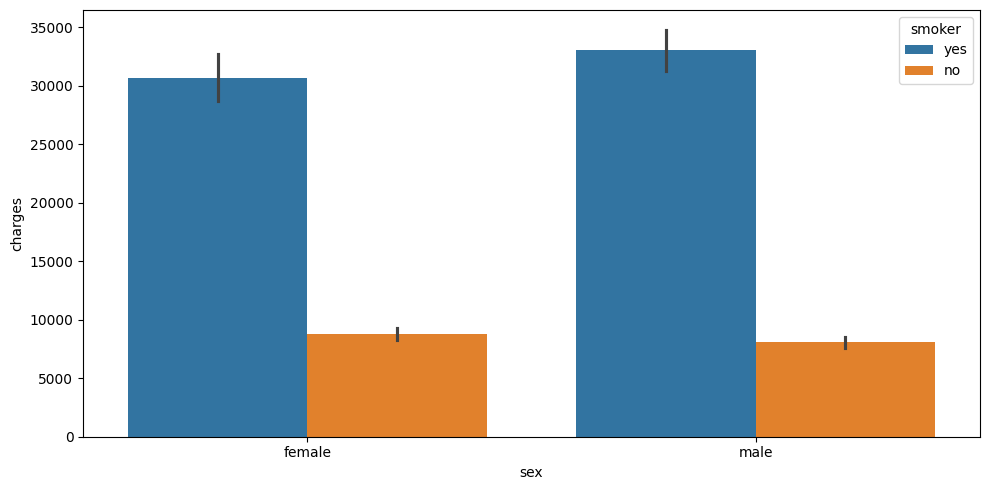

In [13]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.barplot(data = total_data, x = "sex", y = "charges", hue = "smoker")


plt.tight_layout()

plt.show()

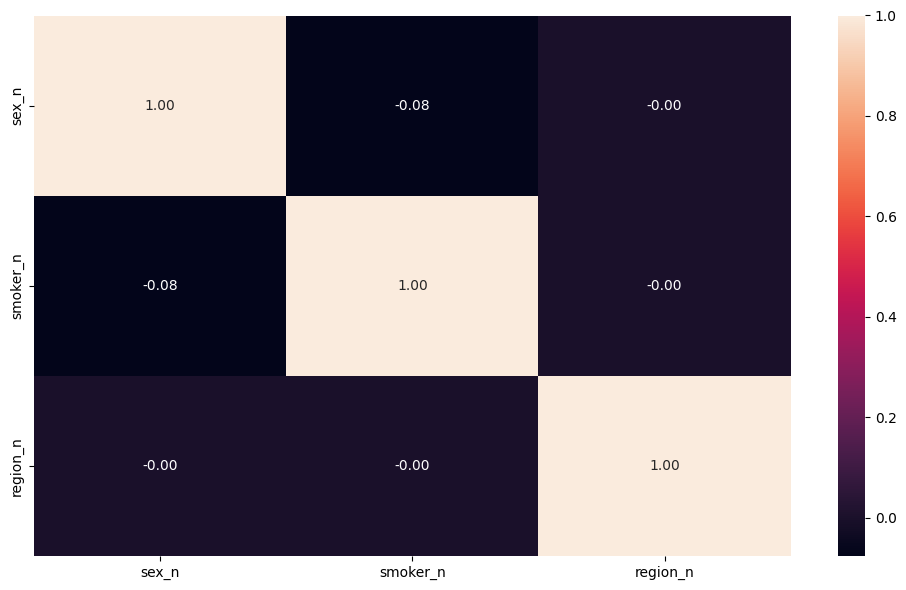

In [14]:
total_data["sex_n"] = pd.factorize(total_data["sex"])[0]
total_data["smoker_n"] = pd.factorize(total_data["smoker"])[0]
total_data["region_n"] = pd.factorize(total_data["region"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["sex_n", "smoker_n", "region_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

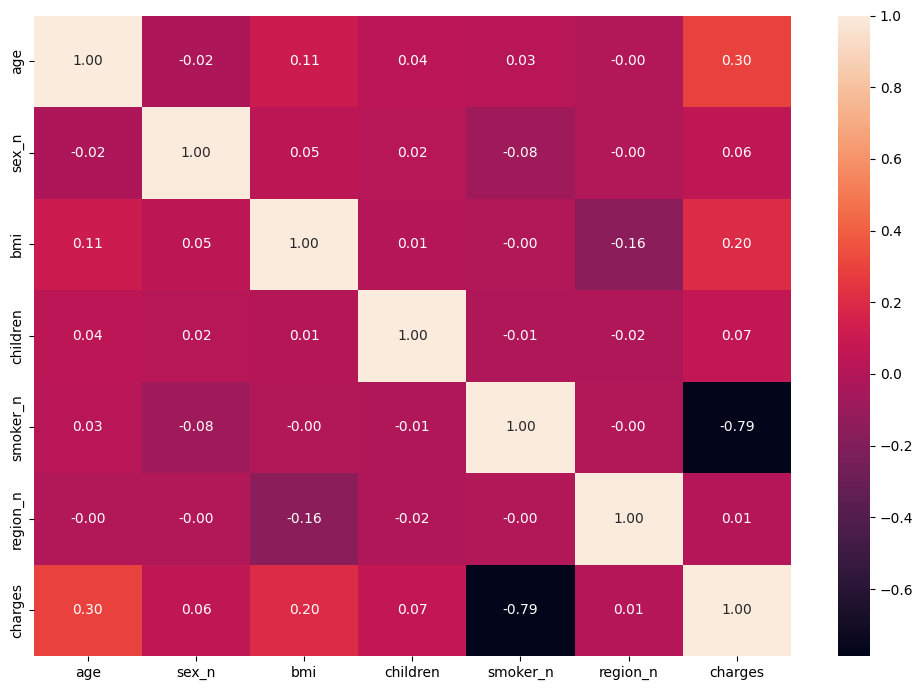

In [15]:
fig, axis = plt.subplots(figsize = (10, 7))
sns.heatmap(total_data[["age", "sex_n", "bmi", "children", "smoker_n", "region_n", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

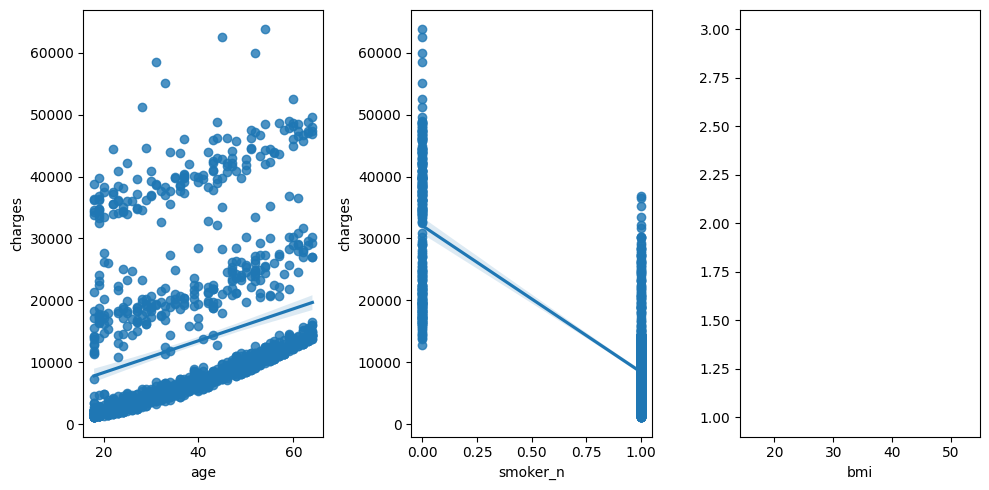

In [17]:

fig, axis = plt.subplots(figsize = (10, 5), ncols = 3)

sns.regplot(ax = axis[0], data = total_data, x = "age", y = "charges")
sns.regplot(ax = axis[1], data = total_data, x = "smoker_n", y = "charges")
sns.regplot(ax = axis[2], data = total_data, x = "bmi", y = "charges").set(ylabel = None, ylim = (0.9, 3.1))

plt.tight_layout()

plt.show()

In [18]:
#Ingeneiria de caracteristicas
total_data.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.795217,1.484305
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,1.104885
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


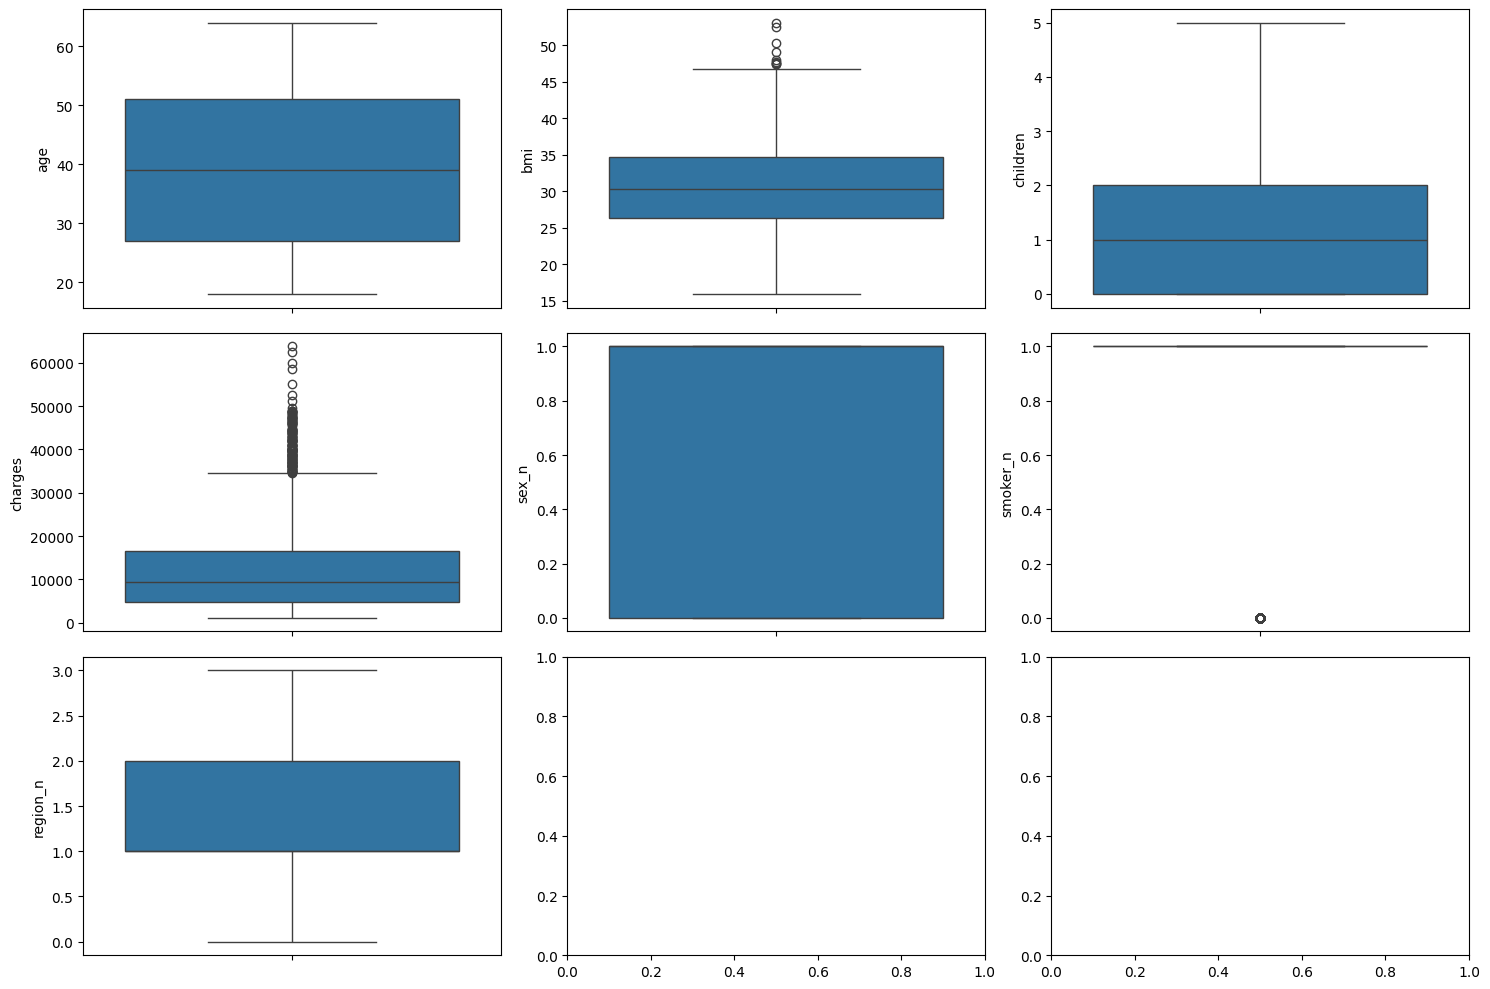

In [19]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "age")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "bmi")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "children")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "charges")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "sex_n")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "smoker_n")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "region_n")


plt.tight_layout()

plt.show()

In [20]:
charges_stats = total_data["charges"].describe()
charges_stats

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [21]:
total_data.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

num_variables = ["age", "sex_n", "bmi", "children", "smoker_n", "region_n"]

# Dividimos el conjunto de datos en muestras de train y test
X = total_data[num_variables]
y = total_data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,sex_n,bmi,children,smoker_n,region_n
560,46,0,19.95,2,1,2
1285,47,0,24.32,0,1,3
1142,52,0,24.86,0,1,1
969,39,0,34.32,5,1,1
486,54,0,21.47,3,1,2


In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,age,sex_n,bmi,children,smoker_n,region_n
560,0.608696,0.0,0.107345,0.4,1.0,0.666667
1285,0.630435,0.0,0.224913,0.0,1.0,1.000000
1142,0.739130,0.0,0.239440,0.0,1.0,0.333333
969,0.456522,0.0,0.493947,1.0,1.0,0.333333
486,0.782609,0.0,0.148238,0.6,1.0,0.666667


In [26]:
#modelo de regresión lineal
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2, b3, b4, b5, b6): {model.coef_}")

Intercepto (a): 10887.358730791077
Coeficientes (b1, b2, b3, b4, b5, b6): [ 2.57056264e+02 -1.87914567e+01  3.35781491e+02  4.25091456e+02
 -2.36478181e+04  2.71284266e+02]


In [29]:
y_pred = model.predict(X_test)
y_pred

array([ 8924.40724442,  7116.29501758, 36909.01352144,  9507.87469118,
       27013.3500079 , 10790.77956153,   226.29844571, 16942.71599941,
        1056.63079407, 11267.91997309, 28048.59793155,  9424.36324087,
        5326.32232088, 38460.06017922, 40303.40597026, 37147.01010262,
       15287.91876684, 35965.05485917,  9179.1753067 , 31510.8319849 ,
        3797.79068365, 10070.82803304,  2312.57551348,  7074.41348194,
       11352.37224357, 12907.77079523, 14448.84678727,  6205.65997921,
        9917.00839638,  2239.50032819,  9060.55469043, 13120.56214535,
        4617.70702822,  3467.91218926,  4402.74821855, 12967.91608907,
        1927.44498944,  8757.9180081 , 33324.35180597, 32638.47697026,
        3852.41756615,  4370.39670883, 14080.76023234, 11478.63402576,
        8829.26135924, 12046.15119133,  5322.80515731,  3100.71182484,
       35546.60547574,  9201.61196817, 15894.23763341,  2406.04003607,
       12397.52052544,  1433.90617387, 13448.14094304, 12519.54174599,
      

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 33635210.43117841
Coeficiente de determinación: 0.7833463107364538
